In [249]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# building a simple neural network

A net takes in inputs, them multiplies each input by a corresponding weight and sums them together and adds this to a constant. This is then passed through a function to spit out an output.

Here, we're mostly using the sigmoid function.

## the sigmoid function

<img src="images/sigmoid.png" width=500 align="left">

The sigmoid function:

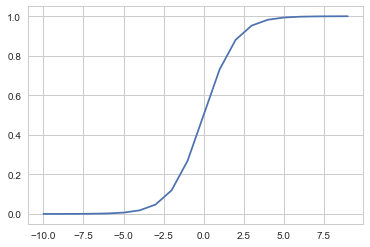

In [103]:
x = [i for i in range(-10,10)]
#print(x)

def sigmoid(num):
    return 1.0 / (1.0 + np.exp(-num))

plt.plot(range(-10,10), [sigmoid(i) for i in x])
plt.show()

## Gradient descent

A simple way to think of this: If you are standing on top of a mountain of errors, then one way to get to the solution is to take a tiny step towards the correct direction.

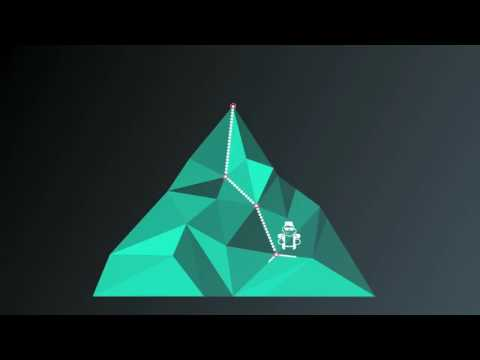

In [108]:
from IPython.display import YouTubeVideo
YouTubeVideo('29PmNG7fuuM', width="560")

In [113]:
# Defining the sigmoid function for activations
def sigmoid(x):
    return 1/(1+np.exp(-x))

# Derivative of the sigmoid function
def sigmoid_prime(x):
    return sigmoid(x) * (1 - sigmoid(x))

x = np.array([0.1, 0.3])
y = 0.2
weights = np.array([-0.8, 0.5])

# The learning rate, eta in the weight step equation
learnrate = 0.5

# The neural network output
nn_output = sigmoid(x[0]*weights[0] + x[1]*weights[1])
# or nn_output = sigmoid(np.dot(x, w))

# output error
error = y - nn_output

# error gradient
error_grad = error * sigmoid_prime(np.dot(x,weights))

# Gradient descent step
del_w = [ learnrate * error_grad * x[0],
          learnrate * error_grad * x[1]]
# or del_w = learnrate * error_grad * x

## simple Gradient descent exercise

Below, you'll calculate one gradient descent step for the weights of a simple network with two inputs and one output unit with a sigmoid activation function.

Your goal here is to calculate the correct weight step using gradient descent. Remember that the weight step is the learning rate times the error times the input values:

In [119]:
def sigmoid(x):
    """
    Calculate sigmoid
    """
    return 1/(1+np.exp(-x))

learnrate = 0.5
x = np.array([1, 2])
y = np.array(0.5)

# Initial weights
w = np.array([0.5, -0.5])

# Calculate one gradient descent step for each weight
# TODO: Calculate output of neural network
nn_output = sigmoid(np.dot(x,w)) 

# TODO: Calculate error of neural network
error = y - nn_output

# TODO: Calculate change in weights
del_w = learnrate * error * nn_output * (1 - nn_output) * x

print('Neural Network output:')
print(nn_output)
print('Amount of Error:')
print(error)
print('Change in Weights:')
print(del_w)

Neural Network output:
0.377540668798
Amount of Error:
0.122459331202
Change in Weights:
[ 0.0143892  0.0287784]


## Implementing gradient descent 

use gradient descent to train a network on graduate school admissions data (found at http://www.ats.ucla.edu/stat/data/binary.csv. This dataset has three input features: GRE score, GPA, and the rank of the undergraduate school (numbered 1 through 4). Institutions with rank 1 have the highest prestige, those with rank 4 have the lowest.

In [271]:
admissions = pd.read_csv('data/binary.csv')
admissions.head()

,admit,gre,gpa,rank
0,0,380,3.61,3
1,1,660,3.67,3
2,1,800,4.00,1
3,1,640,3.19,4
4,0,520,2.93,4


In [272]:
data = pd.concat([admissions, pd.get_dummies(admissions['rank'], prefix='rank')], axis=1)
data = data.drop('rank', axis=1)
data.head()

,admit,gre,gpa,rank_1,rank_2,rank_3,rank_4
0,0,380,3.61,0,0,1,0
1,1,660,3.67,0,0,1,0
2,1,800,4.00,1,0,0,0
3,1,640,3.19,0,0,0,1
4,0,520,2.93,0,0,0,1


In [273]:
# Standarize features
for field in ['gre', 'gpa']:
    mean, std = data[field].mean(), data[field].std()
    data.loc[:,field] = (data[field]-mean)/std

data.head()

,admit,gre,gpa,rank_1,rank_2,rank_3,rank_4
0,0,-1.798011,0.578348,0,0,1,0
1,1,0.625884,0.736008,0,0,1,0
2,1,1.837832,1.603135,1,0,0,0
3,1,0.452749,-0.525269,0,0,0,1
4,0,-0.586063,-1.208461,0,0,0,1


In [274]:
# Split off random 10% of the data for testing
np.random.seed(42)
sample = np.random.choice(data.index, size=int(len(data)*0.9), replace=False)
data, test_data = data.ix[sample], data.drop(sample)
data.shape, test_data.shape

((360, 7), (40, 7))

In [275]:
# Split into features and targets
features, targets = data.drop('admit', axis=1), data['admit']
features_test, targets_test = test_data.drop('admit', axis=1), test_data['admit']

the actual implmentation

the dataset:
features, targets, features_test, targets_test

In [222]:
def sigmoid(x):
    """
    Calculate sigmoid
    """
    return 1 / (1 + np.exp(-x))

# Use to same seed to make debugging easier
np.random.seed(42)

n_records, n_features = features.shape
last_loss = None

# Initialize weights
weights = np.random.normal(scale=1 / n_features**.5, size=n_features)

# Neural Network hyperparameters
epochs = 10000
learnrate = -0.015

for e in range(epochs):
    del_w = np.zeros(weights.shape)
    for x, y in zip(features.values, targets):
        # Loop through all records, x is the input, y is the target

        # TODO: Calculate the output
        output = sigmoid(np.dot(x,weights))

        # TODO: Calculate the error
        error = output - y

        # TODO: Calculate change in weights
        del_w += error * output * (1 - output) * x

        # TODO: Update weights
        weights += (del_w * learnrate) / n_records

    # Printing out the mean square error on the training set
    if e % (epochs / 10) == 0:
        out = sigmoid(np.dot(features, weights))
        loss = np.mean((out - targets) ** 2)
        if last_loss and last_loss < loss:
            print("Train loss: ", loss, "  WARNING - Loss Increasing")
        else:
            print("Train loss: ", loss)
        last_loss = loss


# Calculate accuracy on test data
tes_out = sigmoid(np.dot(features_test, weights))
predictions = tes_out > 0.5
accuracy = np.mean(predictions == targets_test)
print("Prediction accuracy: {:.3f}".format(accuracy))

Train loss:  0.2571513862491301
Train loss:  0.197830424060288
Train loss:  0.19783042822776664   WARNING - Loss Increasing
Train loss:  0.19783042822799557   WARNING - Loss Increasing
Train loss:  0.1978304282279958   WARNING - Loss Increasing
Train loss:  0.1978304282279958
Train loss:  0.1978304282279958
Train loss:  0.1978304282279958
Train loss:  0.1978304282279958
Train loss:  0.1978304282279958
Prediction accuracy: 0.725


## Multilayer perceptrons

for a single neuron, you just have one set of weights, but for multiple layers, you need a set of weights per layer.
so you go from a an array to a matrix.

In [255]:
# Number of records and input units
n_records, n_inputs = features.shape
# Number of hidden units
n_hidden = 2
weights = np.random.normal(0, 1/n_inputs**-2, size=(n_inputs, n_hidden))
weights

array([[-21.66143804,  66.68201464],
       [ -0.48590009, -38.07759344],
       [ 29.61161684, -43.9503714 ],
       [  7.51908942, -70.54812446],
       [-47.81469776,   7.08700449],
       [ 26.58479688,   6.16925812]])

In [256]:
import numpy as np

def sigmoid(x):
    """
    Calculate sigmoid
    """
    return 1/(1+np.exp(-x))

# Network size
N_input = 4
N_hidden = 3
N_output = 2

np.random.seed(42)
# Make some fake data
X = np.random.randn(4)

weights_in_hidden = np.random.normal(0, scale=0.1, size=(N_input, N_hidden))
weights_hidden_out = np.random.normal(0, scale=0.1, size=(N_hidden, N_output))


# TODO: Make a forward pass through the network

hidden_layer_in = np.dot(X, weights_in_hidden)
hidden_layer_out = sigmoid(hidden_layer_in)

print('Hidden-layer Output:')
print(hidden_layer_out)

output_layer_in = np.dot(hidden_layer_out, weights_hidden_out)
output_layer_out = sigmoid(output_layer_in)

print('Output-layer Output:')
print(output_layer_out)

Hidden-layer Output:
[ 0.41492192  0.42604313  0.5002434 ]
Output-layer Output:
[ 0.49815196  0.48539772]


# Back Propogate

Similar to how inputs are propageted through the network, back propogate is sending the errors backwards through the network.

A short overview:

- [Udacity's 1min overview](https://www.youtube.com/watch?v=MZL97-2joxQ)
- [series of short videos on neural networks](https://www.youtube.com/playlist?list=PLiaHhY2iBX9hdHaRr6b7XevZtgZRa1PoU)
- [long lecture, useful](https://www.youtube.com/watch?v=i94OvYb6noo)

In [290]:
def sigmoid(x):
    """
    Calculate sigmoid
    """
    return 1 / (1 + np.exp(-x))

x = np.array([0.5, 0.1, -0.2])
target = 0.6
learnrate = 0.5

weights_input_hidden = np.array([[0.5, -0.6],
                                 [0.1, -0.2],
                                 [0.1, 0.7]])
weights_hidden_output = np.array([0.1, -0.3])

## Forward pass
hidden_layer_input = np.dot(x, weights_input_hidden)
hidden_layer_output = sigmoid(hidden_layer_input)

output_layer_in = np.dot(hidden_layer_output, weights_hidden_output)
output = sigmoid(output_layer_in)

## Backwards pass
## TODO: Calculate error
error = target - output

# TODO: Calculate error gradient for output layer
del_err_output = error * output * (1 - output)

# TODO: Calculate error gradient for hidden layer
del_err_hidden = np.dot(del_err_output, weights_hidden_output) * \
                 hidden_layer_output * (1 - hidden_layer_output)

# TODO: Calculate change in weights for hidden layer to output layer
delta_w_h_o = learnrate * del_err_output * hidden_layer_output

# TODO: Calculate change in weights for input layer to hidden layer
delta_w_i_o = learnrate * del_err_hidden * x[:, None]

print('Change in weights for hidden layer to output layer:')
print(delta_w_h_o)
print('Change in weights for input layer to hidden layer:')
print(delta_w_i_o)

Change in weights for hidden layer to output layer:
[ 0.00804047  0.00555918]
Change in weights for input layer to hidden layer:
[[  1.77005547e-04  -5.11178506e-04]
 [  3.54011093e-05  -1.02235701e-04]
 [ -7.08022187e-05   2.04471402e-04]]


implement backprop.py 

In [291]:
import numpy as np
#from data_prep import features, targets, features_test, targets_test

np.random.seed(42)

def sigmoid(x):
    """
    Calculate sigmoid
    """
    return 1 / (1 + np.exp(-x))


# Hyperparameters
n_hidden = 3  # number of hidden units
epochs = 500
learnrate = -0.02

n_records, n_features = features.shape
last_loss = None
# Initialize weights
weights_input_hidden = np.random.normal(scale=1 / n_features ** .5,
                                        size=(n_features, n_hidden))
weights_hidden_output = np.random.normal(scale=1 / n_features ** .5,
                                         size=n_hidden)

for e in range(epochs):
    del_w_input_hidden = np.zeros(weights_input_hidden.shape)
    del_w_hidden_output = np.zeros(weights_hidden_output.shape)
    for x, y in zip(features.values, targets):
        ## Forward pass ##
        # TODO: Calculate the output
        hidden_input = np.dot(x, weights_input_hidden)
        hidden_activations = sigmoid(hidden_input)
        output = np.dot(hidden_activations, weights_hidden_output)

        ## Backward pass ##
        # TODO: Calculate the error
        error = y - output

        # TODO: Calculate error gradient in output unit
        output_error = error * output * (1 - output)

        # TODO: propagate errors to hidden layer
        hidden_error = np.dot(output_error, weights_hidden_output) \
        * hidden_activations * (1 - hidden_activations)

        # TODO: Update the change in weights
        del_w_hidden_output += hidden_error * hidden_activations
        del_w_input_hidden += hidden_error * x[:, None]

    # TODO: Update weights
    weights_input_hidden += learnrate * del_w_input_hidden / n_records
    weights_hidden_output += learnrate * del_w_hidden_output / n_records

    # Printing out the mean square error on the training set
    if e % (epochs / 10) == 0:
        hidden_activations = sigmoid(np.dot(x, weights_input_hidden))
        out = sigmoid(np.dot(hidden_activations,
                             weights_hidden_output))
        loss = np.mean((out - targets) ** 2)

        if last_loss and last_loss < loss:
            print("Train loss: ", loss, "  WARNING - Loss Increasing")
        else:
            print("Train loss: ", loss)
        last_loss = loss

# Calculate accuracy on test data
hidden = sigmoid(np.dot(features_test, weights_input_hidden))
out = sigmoid(np.dot(hidden, weights_hidden_output))
predictions = out > 0.5
accuracy = np.mean(predictions == targets_test)
print("Prediction accuracy: {:.3f}".format(accuracy))

Train loss:  0.22938805871942275
Train loss:  0.22919565585046983
Train loss:  0.22900788563931743
Train loss:  0.22882511525327295
Train loss:  0.22864772197908653
Train loss:  0.22847609367853955
Train loss:  0.22831062923349468
Train loss:  0.22815173894979593
Train loss:  0.22799984488533198
Train loss:  0.2278553810641171
Prediction accuracy: 0.750
